# Opening the ecoli file

In [1]:
dna = ""
file = open("data/ecoli_uti89.txt")
for line in file.readlines():
    dna += line.strip()

In [2]:
dna[:10]

'AGCTTTTCAT'

In [3]:
len(dna)

5065741

# Defining the functions to test

In [4]:
def count_builtin(dna):
    return dna.count("C")

In [5]:
def count_loop(dna):
    count = 0
    for let in dna:
        if let == "C":
            count += 1
    return count

In [6]:
def count_other_chars(dna): 
    count = 0 
    for let in dna: 
        if let != "c": 
            count += 1 
    return len(dna) - count 

In [21]:
def count_what_it_is_not(dna): 
    A = dna.count("A") 
    T = dna.count("T") 
    G = dna.count("G") 
    Length = len(dna) 
    Total = Length - A - T - G 
    return Total 

In [8]:
def count_back(str) -> int: 
    c = 0 
    count = len(str) 
    while not count < 0: 
        if str[count - 1] == "C": 
            c += 1 
        count -= 1 
    return c 

In [9]:
def count_backwards(dna): 
    count = len(dna) 
    for let in dna: 
        if let != "C":  
            count = count - 1 
    return count 

In [10]:
def count_see(dna) :
    Count = 0 
    for let in dna: 
        if let != "C" :
            dna.replace(let, "") 
    for lett in dna: 
        Count +=1 
    return Count 

In [26]:
def count_list(dna: str): 
    Empty = [] 
    for x in dna: 
        if x == "C": 
            Empty.append(x) 
    return len(Empty) 

In [50]:
def count_recursive(dna): 
    if len(dna) == 0: 
        return 0 
    if len(dna) == 1 :
        if dna == 'C' :
            return 1 
        else: 
            return 0 
    else: 
        return count_recursive(dna[0:len(dna)//2]) + count_recursive(dna[len(dna)//2:]) 

In [60]:
def count_c(dna: str):
    C = 0 
    N = 0 
    while True : 
        if C == len(dna) :
            return N 
        if dna[C] == "C": 
            N += 1 
        C += 1 
    return C

In [64]:
def count_base(strand): 
    bases = {"A":0,"T":0,"C":0,"G":0} 
    for base in strand:
        for i in bases: 
            if base == i: 
                bases[i] = bases[i]+1 
    return bases[base] 

In [65]:
funcs = []
funcs.append(count_builtin)
funcs.append(count_loop)
funcs.append(count_other_chars)
funcs.append(count_what_it_is_not)
funcs.append(count_back)
funcs.append(count_backwards)
#funcs.append(count_see)
funcs.append(count_list)
funcs.append(count_recursive)
funcs.append(count_c)
funcs.append(count_base)

# Running the timing experiment

In [66]:
names = []
timings = []
results = []
import time

for f in funcs:
    t0 = time.process_time()
    results.append(f(dna))
    t1 = time.process_time()
    cpu_time = t1 - t0
    timings.append(cpu_time)
    names.append(f.__name__[6:])

In [67]:
names

['builtin',
 'loop',
 'other_chars',
 'what_it_is_not',
 'back',
 'backwards',
 'list',
 'recursive',
 'c',
 'base']

In [68]:
results

[1284322,
 1284322,
 0,
 1284322,
 1284323,
 1284322,
 1284322,
 1284322,
 1284322,
 1284322]

In [69]:
timings

[0.01853199999999333,
 0.2634690000000006,
 0.39790699999998935,
 0.05138300000000129,
 0.825679000000008,
 0.339343999999997,
 0.27201900000000023,
 3.3927300000000002,
 0.972132000000002,
 1.5633260000000035]

# Plotting the results

In [70]:
%matplotlib inline
import pandas as pd
from plotnine import *

In [71]:
df = pd.DataFrame({"names":names,
                  "timings":timings,
                  "results":results})

In [72]:
df

,names,timings,results
0,builtin,0.018532,1284322
1,loop,0.263469,1284322
2,other_chars,0.397907,0
3,what_it_is_not,0.051383,1284322
4,back,0.825679,1284323
5,backwards,0.339344,1284322
6,list,0.272019,1284322
7,recursive,3.392730,1284322
8,c,0.972132,1284322
9,base,1.563326,1284322


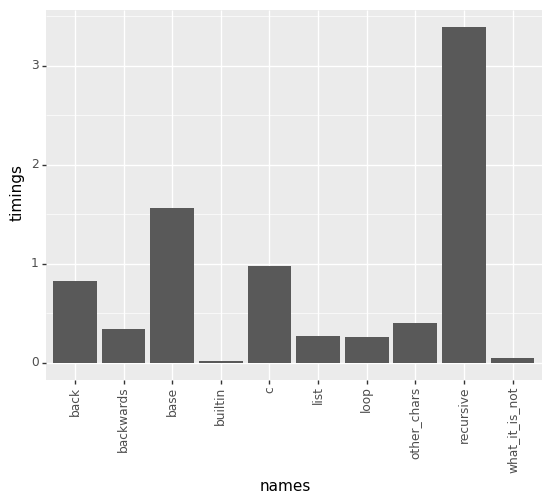

<ggplot: (288790760)>

In [76]:
ggplot(df, aes(x="names", y="timings")) + geom_col() + theme(axis_text_x=element_text(rotation=90))